In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('events.csv',low_memory=False)
#df.head()

# Analisis geografico de las visitas a Trocafone

In [4]:
#Quitar los paises NaN para conocer si hubo alguna venta de un pais conocido
dfchico=df.loc[(df['city'].isnull())==False,:]
dfchico['event'].value_counts()

visited site    87378
Name: event, dtype: int64

In [5]:
#Como los datos permiten saber desde que pais se visito el sitio, el 3.51% 
#(Visitas totales= 87378, visitas brasil 84308, vistas otro lado=3070)


In [6]:
#Fijarse si el fin de semana mas gente esta al pedo y compra mas celulares

In [ ]:
df['time'] = pd.to_datetime(df['timestamp'])
df['month'] = df['time'].dt.month

In [50]:
#Si es nueva la API que toma el pais y region, asumir que todo es brasil
visitas_brasil = df.loc[df['country']=='Brazil']['month'].value_counts().sort_index()
visitas_brasil.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']


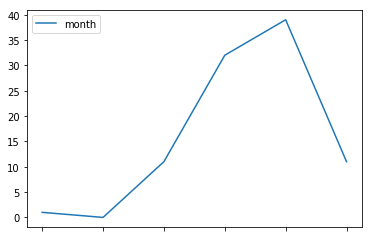

In [73]:
va = df.loc[df['country']=='Argentina']['month'].value_counts().sort_index()
va = va.reset_index().append(pd.DataFrame({'index':[2],'month':[0]}))
va = va.set_index('index')
va = va.sort_index()
va.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio']

# Visitas desde Brasil en funcion del mes

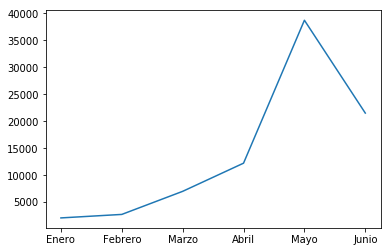

In [57]:
plt.plot(visitas_brasil)

# Visitas desde Argentina en función del mes

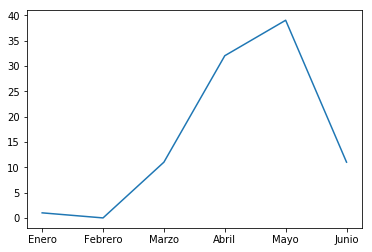

In [74]:
plt.plot(va)

# ¿Los datos de junio estan incompletos?

In [76]:
df['dia'] = df['time'].dt.day
junio = df.loc[df['month']==6]

In [127]:
dias = junio['dia'].value_counts().sort_index()
d = dias.to_frame()
d.columns = ['Cant. Eventos']
d

,Cant. Eventos
1,20528
2,19113
3,16630
4,22651
5,25705
6,22281
7,22879
8,18442
9,15493
10,13122


#### Los datos de junio llegan unicamente hasta el dia 15, por eso hay menos en los graficos anteriores